In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
!rm -r modules

In [3]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

In [4]:
# import modules
import requests
from pathlib import Path
import os


directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)
  
helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [5]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement

# Quantum Multiplier Circuit Implementation
The implementation consist of a basic achitecture of two times one inputs with a three bit output.

In [6]:
# number of qubits in the circuit
num_qubits = 10

In [7]:
# instance the quantum circuit
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr,cr)

In [8]:
# target_qubits = [0,2] # case 101
# target_qubits = [0,1,2] # case 111
target_qubits = [1,2] # case 011
initialize_quantum_circuit(qc,target_qubits)

In [9]:
# add the tofoli gates
qc.ccx(qr[0],qr[1],qr[3])
qc.ccx(qr[0],qr[2],qr[7])

In [10]:
from modules.quantum_hardware_circuits import qfa

In [11]:
# create two instanced of a quantum full adder circuit
qfa_1 = qfa()
qfa_2 = qfa()

In [12]:
# add the adders to the circuit in the corresponding position
qc.append(qfa_1,[qr[3],qr[4],qr[5],qr[6]])
qc.append(qfa_2,[qr[7],qr[8],qr[6],qr[9]])

In [13]:
# measure the qubits 
output_qubits = [5,6,9]
for q in output_qubits:
  qc.measure(qr[q],cr[q])

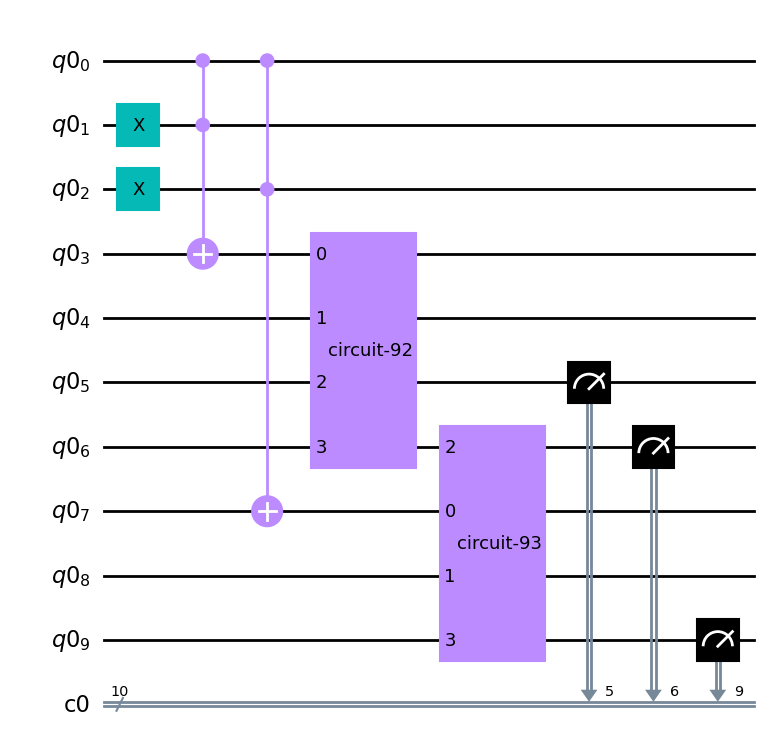

In [14]:
qc.draw("mpl")

In [15]:
# get the mearurements
measurements_counts = ideal_qc_simulation(qc,backend,1)

In [16]:
output = list(measurements_counts.keys())[0]
output

'0000000000'

In [17]:
reversed_output = reverse_output(output)
reversed_output

'0000000000'

In [18]:
filtered_output = get_target_measurement(reversed_output,output_qubits)
filtered_output

'000'

# Three adder circuit:

In [19]:
# number of qubits in the circuit
num_qubits = 14

In [20]:
# number of output qubits 
num_output_qubits = 4

In [21]:
# instance the quantum circuit
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_output_qubits)
qc = QuantumCircuit(qr,cr)

In [22]:
target_qubits = [0,1,2,3] # case 011
initialize_quantum_circuit(qc,target_qubits)

In [23]:
# copy bits into the qubit 
qc.ccx(qr[0],qr[2],qr[4])
qc.ccx(qr[0],qr[3],qr[8])
qc.ccx(qr[1],qr[2],qr[9])
qc.ccx(qr[1],qr[3],qr[11])

In [24]:
# inatance quantum full adders
qfa_1 = qfa()
qfa_2 = qfa()
qfa_3 = qfa()


In [25]:
# add the full adder
qc.append(qfa_1,[qr[4],qr[5],qr[6],qr[7]])
qc.append(qfa_2,[qr[8],qr[9],qr[7],qr[10]])
qc.append(qfa_3,[qr[11],qr[12],qr[10],qr[13]])


In [26]:
output_qubits = [6,7,10,13]
for c,q in enumerate(output_qubits):
  qc.measure(qr[q],cr[c])

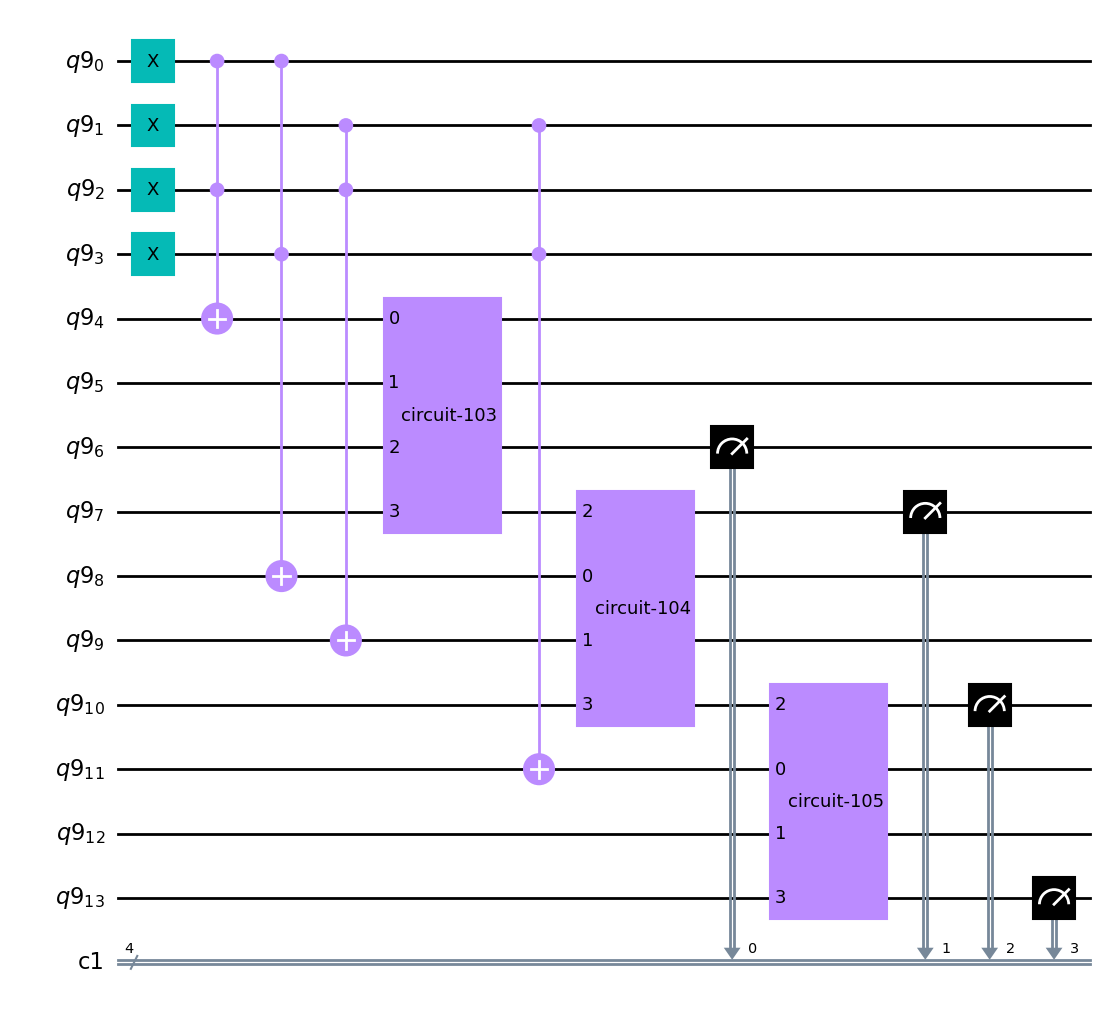

In [27]:
qc.draw("mpl")

In [28]:
measurements_counts = ideal_qc_simulation(qc,backend,1)

In [29]:
output = list(measurements_counts.keys())[0]

In [30]:
reversed_output = reverse_output(output)
reversed_output

'1001'

# Pattern for concatenatting quantum adders:
Observations based on the two past experiments:
- The output corresponding to the third input of the quantum full adder is connected to the second output of the next adder: $3_{out} \rightarrow 2_{in}$.
- The $2_{out}$ qubit of each adder corresponds to the multiplier’s output at that position.
- The $3_{out}$ of the last adder is the carry out.
- The inputs are copied to $0_{in}$ using the toffoli gate.
- Adding one more adder implies 4 more qubits in the quantum register.
- For the second adder, both inputs $x$ and $y$ are used for two toffoli gate combinations.